In [2]:
from frgc import FRGCDataset
from pair_selection import make_morph_pairs
from utils.visual import draw_bbox
from utils.file import get_image
from PIL import Image
import os
import torch
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [3]:
def dis_imgs_side_by_side(img_path1, img_path2):
    # Open the PNG images
    image1 = Image.open(img_path1)
    image2 = Image.open(img_path2)

    # Get the dimensions of both images
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Calculate the total width and maximum height
    total_width = width1 + width2
    max_height = max(height1, height2)

    # Create a new image with the calculated dimensions
    new_image = Image.new('RGB', (total_width, max_height))

    # Paste the images side by side
    new_image.paste(image1, (0, 0))
    new_image.paste(image2, (width1, 0))

    # Display the new image
    new_image.show()

In [9]:
data = FRGCDataset("/mnt2/PhD-Marcel/ldm-face-manipulation/latent-diffusion/taming-transformers/data/morph_db")
pair_indices = make_morph_pairs(data)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ubuntu/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ubuntu/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ubuntu/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ubuntu/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ubuntu/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
se

Extracting features: 100%|██████████| 1440/1440 [00:39<00:00, 36.62it/s]


In [15]:
i = np.random.randint(0, len(data))
j = pair_indices[i]
contributor_a, contributor_b = (data[i], data[j])

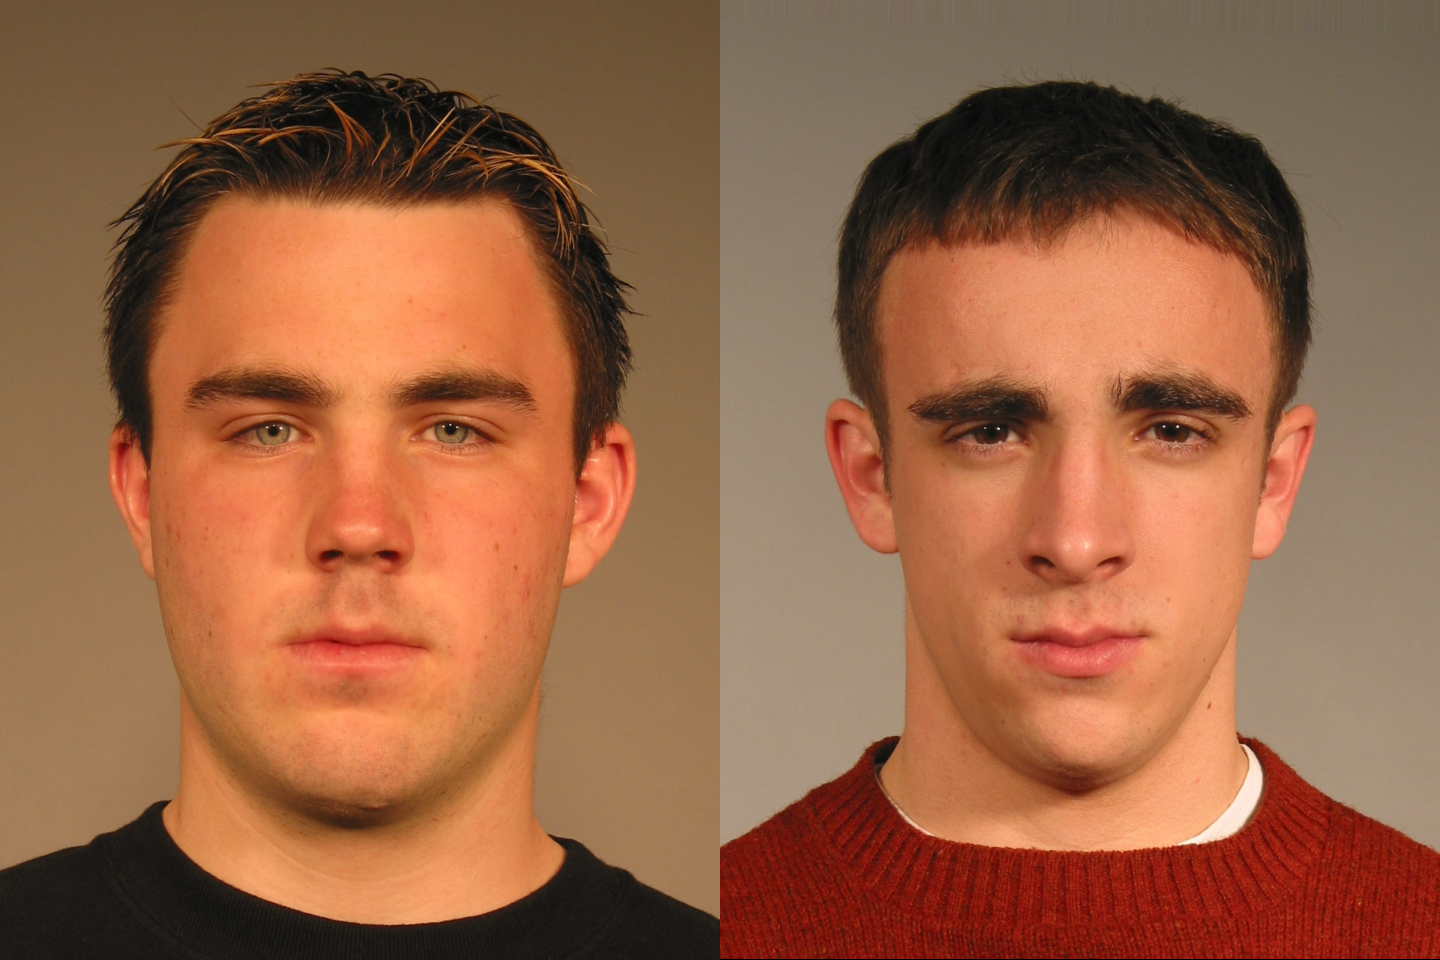

In [16]:

dis_imgs_side_by_side(contributor_a['file'], contributor_b['file'])

In [19]:
contributor_a

{'file': '/mnt2/PhD-Marcel/ldm-face-manipulation/latent-diffusion/taming-transformers/data/morph_db/reference/04369d102.png',
 'file_pair': None,
 'subject': '04369',
 'gender': 'male',
 'ethnicity': 'caucasian',
 'skin_type': '2',
 'age': 'young',
 'features': {'bbox': array([150.88832, 204.42914, 570.17334, 810.2446 ], dtype=float32),
  'kps': array([[268.2149 , 429.6389 ],
         [455.11218, 432.34283],
         [357.07806, 537.2713 ],
         [278.20853, 642.28094],
         [431.90106, 645.78186]], dtype=float32),
  'det_score': 0.90248084,
  'landmark_3d_68': array([[ 1.4105453e+02,  4.3262549e+02,  2.9949460e+02],
         [ 1.4873160e+02,  4.9454166e+02,  2.9395331e+02],
         [ 1.5700446e+02,  5.5841321e+02,  2.8258081e+02],
         [ 1.6623062e+02,  6.2046503e+02,  2.6206613e+02],
         [ 1.8277429e+02,  6.7800385e+02,  2.1749750e+02],
         [ 2.0974554e+02,  7.2197278e+02,  1.7686147e+02],
         [ 2.4333641e+02,  7.5499152e+02,  1.4068040e+02],
         [ 2.8